# EDA about Casting dataset

- dataset link : https://www.kamp-ai.kr/noticeDetail?NOTICE_SEQ=76
- Dataset Description
    - Casting is a manufacturing process where metals (such as iron, aluminum alloys, copper, etc.) are melted and poured into molds to solidify, making it suitable for creating detailed and complex shapes and ideal for mass production.
    - Types of casting include die casting (metal molds), sand casting (sand molds), and shell casting (cell molds).
    - Die casting is a process where molten metal is forcibly injected into a metal mold (die), primarily using aluminum alloys, copper alloys, and magnesium alloys. The advantages of die casting include high precision, low cost, and fast production speed.
        - Key factors in die casting include the management of pressure, speed, time, and temperature.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:

df = pd.read_csv('./casting.csv', encoding='cp949', index_col=0)
df.head()

/tmp/ipykernel_4103599/1667858162.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./casting.csv', encoding='cp949', index_col=0)


,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,facility_operation_cycleTime,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,119,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,100,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,99,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B


In [42]:
df.columns

Index(['line', 'name', 'mold_name', 'time', 'date', 'count', 'working',
       'emergency_stop', 'molten_temp', 'facility_operation_cycleTime',
       'production_cycletime', 'low_section_speed', 'high_section_speed',
       'molten_volume', 'cast_pressure', 'biscuit_thickness',
       'upper_mold_temp1', 'upper_mold_temp2', 'upper_mold_temp3',
       'lower_mold_temp1', 'lower_mold_temp2', 'lower_mold_temp3',
       'sleeve_temperature', 'physical_strength', 'Coolant_temperature',
       'EMS_operation_time', 'registration_time', 'passorfail',
       'tryshot_signal', 'mold_code', 'heating_furnace'],
      dtype='object')

- 변수 설명
    - line : Name of the production line where the product is manufactured.
    - name : The name of the product.
    - mold_name : The name of the mold used to produce the product.
    - time : The time when the data was collected (hours, minutes, seconds).
    - date : The date when the data was collected.
    - count : The unique number of the product produced on that specific date, representing the production sequence for each day.
    - working : Indicates whether the facility is operational ('Operating' or 'Stopped').
    - emergency_stop : Indicates whether the facility is in an emergency stop state ('ON' or 'OFF').
    - molten_temp : The temperature of the molten metal (molten temperature).
    - facility_operation_CycleTime : The operation cycle time of the facility, indicating how long one cycle of operation took.
    - production_CycleTime : The cycle time required to produce one product.
    - low_section_speed : The speed during the low-speed section, which refers to the speed at which metal is injected during the low-speed phase of die casting.
    - high_section_speed : The speed during the high-speed section, referring to the speed of metal injection during the high-speed phase of die casting.
    - molten_volume : The volume of molten metal used for casting.
    - cast_pressure : The pressure applied when injecting metal into the mold during casting.
    - biscuit_thickness : The thickness of the biscuit, the leftover portion between the product and the mold after casting.
    - upper_mold_temp1 : The temperature at the first point of the upper mold.
    - upper_mold_temp2 : The temperature at the second point of the upper mold.
    - upper_mold_temp3 : The temperature at the third point of the upper mold.
    - lower_mold_temp1 : The temperature at the first point of the lower mold.
    - lower_mold_temp2 : The temperature at the second point of the lower mold.
    - lower_mold_temp3 : The temperature at the third point of the lower mold.
    - sleeve_temperature : The temperature of the sleeve (a specific part of the mold).
    - physical_strength : The physical strength of the product (or measured force).
    - Coolant_temperature : The temperature of the coolant used to rapidly cool the metal after casting.
    - EMS_operation_time : The operation time of the electromagnetic stirring equipment.
    - registration_time : The time when the data was recorded.
    - passorfail : Indicates whether the product passed or failed quality checks (0: Pass, 1: Fail).
    - tryshot_signal : The tryshot signal, a signal used under certain conditions during casting.
    - mold_code : The code number of the mold used.
    - heating_furnace : The name or code of the heating furnace used during production.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92015 entries, 0 to 92014
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   line                          92015 non-null  object 
 1   name                          92015 non-null  object 
 2   mold_name                     92015 non-null  object 
 3   time                          92015 non-null  object 
 4   date                          92015 non-null  object 
 5   count                         92015 non-null  int64  
 6   working                       92014 non-null  object 
 7   emergency_stop                92014 non-null  object 
 8   molten_temp                   89754 non-null  float64
 9   facility_operation_cycleTime  92015 non-null  int64  
 10  production_cycletime          92015 non-null  int64  
 11  low_section_speed             92014 non-null  float64
 12  high_section_speed            92014 non-null  float64
 13  molten

In [44]:
df.isnull().sum().div(len(df))

line                            0.000000
name                            0.000000
mold_name                       0.000000
time                            0.000000
date                            0.000000
count                           0.000000
working                         0.000011
emergency_stop                  0.000011
molten_temp                     0.024572
facility_operation_cycleTime    0.000000
production_cycletime            0.000000
low_section_speed               0.000011
high_section_speed              0.000011
molten_volume                   0.490464
cast_pressure                   0.000011
biscuit_thickness               0.000011
upper_mold_temp1                0.000011
upper_mold_temp2                0.000011
upper_mold_temp3                0.003402
lower_mold_temp1                0.000011
lower_mold_temp2                0.000011
lower_mold_temp3                0.003402
sleeve_temperature              0.000011
physical_strength               0.000011
Coolant_temperat

- Variables with more than 30% missing data (molten_volume, tryshot_signal, heating_furnace) are excluded from the analysis.
- Afterward, rows containing missing data will be removed.

In [45]:
df = df.drop(columns=['molten_volume', 'tryshot_signal','heating_furnace'])
df = df.dropna() # null 값 포함 행 제거

In [46]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

line                            0
name                            0
mold_name                       0
time                            0
date                            0
count                           0
working                         0
emergency_stop                  0
molten_temp                     0
facility_operation_cycleTime    0
production_cycletime            0
low_section_speed               0
high_section_speed              0
cast_pressure                   0
biscuit_thickness               0
upper_mold_temp1                0
upper_mold_temp2                0
upper_mold_temp3                0
lower_mold_temp1                0
lower_mold_temp2                0
lower_mold_temp3                0
sleeve_temperature              0
physical_strength               0
Coolant_temperature             0
EMS_operation_time              0
registration_time               0
passorfail                      0
mold_code                       0
dtype: int64

In [47]:
df.columns

Index(['line', 'name', 'mold_name', 'time', 'date', 'count', 'working',
       'emergency_stop', 'molten_temp', 'facility_operation_cycleTime',
       'production_cycletime', 'low_section_speed', 'high_section_speed',
       'cast_pressure', 'biscuit_thickness', 'upper_mold_temp1',
       'upper_mold_temp2', 'upper_mold_temp3', 'lower_mold_temp1',
       'lower_mold_temp2', 'lower_mold_temp3', 'sleeve_temperature',
       'physical_strength', 'Coolant_temperature', 'EMS_operation_time',
       'registration_time', 'passorfail', 'mold_code'],
      dtype='object')

## 1. summary statistics

- Descirbe about numeric variables

In [48]:
# Extract relevant columns for summary statistics
columns_of_interest = ['facility_operation_cycleTime', 'production_cycletime', 'low_section_speed', 
                       'high_section_speed','cast_pressure', 'biscuit_thickness', 'upper_mold_temp1', 
                       'upper_mold_temp2', 'upper_mold_temp3','lower_mold_temp1', 'lower_mold_temp2', 'lower_mold_temp3','sleeve_temperature', 
                       'physical_strength', 'Coolant_temperature', 'EMS_operation_time','passorfail', 'mold_code']
df['mold_code'] = df['mold_code'].astype('object')

# Extract the main features and target variable
df_main_features = df[columns_of_interest]

# Generate summary statistics for these features
summary_stats = df_main_features.describe()

summary_stats

,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail
count,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000,89441.000000
mean,121.702239,122.318925,110.067922,111.837960,324.527219,50.717881,186.058821,166.520488,1316.772073,204.734484,200.693474,1441.774891,416.044622,703.127101,32.303049,18.279000,0.044186
std,12.169837,12.549906,309.504180,9.646943,27.308033,18.043014,46.343803,31.774197,396.757216,53.716432,44.884524,221.929145,116.456759,308.047352,14.452419,8.433715,0.205508
min,69.000000,0.000000,0.000000,0.000000,41.000000,0.000000,18.000000,15.000000,42.000000,18.000000,20.000000,299.000000,23.000000,0.000000,16.000000,0.000000,0.000000
25%,117.000000,119.000000,110.000000,112.000000,329.000000,47.000000,162.000000,149.000000,1449.000000,166.000000,174.000000,1449.000000,380.000000,697.000000,31.000000,23.000000,0.000000
50%,119.000000,121.000000,110.000000,112.000000,330.000000,50.000000,195.000000,173.000000,1449.000000,210.000000,199.000000,1449.000000,457.000000,703.000000,32.000000,23.000000,0.000000
75%,122.000000,123.000000,110.000000,112.000000,331.000000,53.000000,222.000000,185.000000,1449.000000,251.000000,229.000000,1449.000000,483.000000,710.000000,34.000000,23.000000,0.000000
max,457.000000,482.000000,65535.000000,388.000000,348.000000,422.000000,1449.000000,4232.000000,1449.000000,369.000000,1449.000000,65503.000000,1449.000000,65535.000000,1449.000000,23.000000,1.000000


In [49]:
df_main_features

,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,119,120,110.0,112.0,331.0,35.0,198.0,116.0,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
22,119,120,109.0,125.0,177.0,48.0,24.0,33.0,1449.0,30.0,273.0,1449.0,479.0,708.0,35.0,23,1.0,8722
24,119,123,109.0,112.0,176.0,49.0,26.0,55.0,1449.0,30.0,323.0,1449.0,513.0,700.0,35.0,23,1.0,8722
26,119,124,109.0,112.0,331.0,47.0,31.0,65.0,1449.0,30.0,343.0,1449.0,531.0,708.0,34.0,23,1.0,8722
28,120,124,110.0,112.0,331.0,46.0,36.0,73.0,1449.0,31.0,343.0,1449.0,544.0,707.0,34.0,23,1.0,8722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,122,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
92011,120,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
92012,122,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
92013,133,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


### 1. 이상치 확인 및 제거

- 이상치 때문에 분석 시, 시각화 자료에서 왜곡되는 현상이 생길 수 있음
- 따라서 이상치 제거!
    - 제거 방법 1 : IQR method
    - 제거 방법 2 : 99.9 percentile, 0.1 percentile

In [50]:
# IQR method
# Detect outliers using the IQR method (for numeric columns)
Q1 = df_main_features.quantile(0.25)
Q3 = df_main_features.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values that fall outside 1.5 * IQR above Q3 or below Q1
outliers = ((df_main_features < (Q1 - 1.5 * IQR)) | (df_main_features > (Q3 + 1.5 * IQR))).sum()

outliers

facility_operation_cycleTime     6383
production_cycletime             6316
low_section_speed               22059
high_section_speed              31925
cast_pressure                   20063
biscuit_thickness                 904
upper_mold_temp1                  670
upper_mold_temp2                 1046
upper_mold_temp3                 8943
lower_mold_temp1                   50
lower_mold_temp2                  849
lower_mold_temp3                 1723
sleeve_temperature              10748
physical_strength                5809
Coolant_temperature              3239
EMS_operation_time              21749
passorfail                       3952
mold_code                           0
dtype: int64

- IQR method로 제거 시, 너무 많은 데이터를 소실하게 됨.

In [51]:
# Create a copy of the dataframe to preserve the original data
df_filtered = df_main_features.copy()

# Initialize dictionaries to store UCL and LCL for each column
UCL_dict = {}
LCL_dict = {}

# Initialize a dictionary to store the number of outliers for each column
outliers_count = {}

# Calculate the UCL and LCL for all columns (excluding 'passorfail')
for col in df_filtered.columns.drop('passorfail'):
    UCL_dict[col] = np.percentile(df_filtered[col], 99.9)  # Upper Control Limit (99.9th percentile)
    LCL_dict[col] = np.percentile(df_filtered[col], 0.1)   # Lower Control Limit (0.1th percentile)
    
    # Count how many rows are above UCL or below LCL for the current column
    num_outliers_above = (df_filtered[col] > UCL_dict[col]).sum()
    num_outliers_below = (df_filtered[col] < LCL_dict[col]).sum()
    
    # Store the total number of outliers for this column
    outliers_count[col] = num_outliers_above + num_outliers_below
    
    # Print the number of outliers for the current column
    print(f'{col}: {num_outliers_above} above UCL, {num_outliers_below} below LCL')

# Store the initial number of rows
initial_row_count = df_filtered.shape[0]

# Filter rows based on UCL and LCL for all columns in one go
for col in df_filtered.columns.drop('passorfail'):
    df_filtered = df_filtered[(df_filtered[col] <= UCL_dict[col]) & (df_filtered[col] >= LCL_dict[col])]

# Calculate the total number of rows removed
total_rows_removed = initial_row_count - df_filtered.shape[0]

# Print how many rows were removed in total
print(f'Total rows removed after filtering: {total_rows_removed}')

facility_operation_cycleTime: 88 above UCL, 88 below LCL
production_cycletime: 88 above UCL, 75 below LCL
low_section_speed: 12 above UCL, 0 below LCL
high_section_speed: 89 above UCL, 80 below LCL
cast_pressure: 90 above UCL, 86 below LCL
biscuit_thickness: 71 above UCL, 89 below LCL
upper_mold_temp1: 80 above UCL, 81 below LCL
upper_mold_temp2: 68 above UCL, 90 below LCL
upper_mold_temp3: 0 above UCL, 83 below LCL
lower_mold_temp1: 89 above UCL, 90 below LCL
lower_mold_temp2: 75 above UCL, 88 below LCL
lower_mold_temp3: 1 above UCL, 89 below LCL
sleeve_temperature: 74 above UCL, 87 below LCL
physical_strength: 82 above UCL, 75 below LCL
Coolant_temperature: 77 above UCL, 56 below LCL
EMS_operation_time: 0 above UCL, 0 below LCL
mold_code: 0 above UCL, 0 below LCL
Total rows removed after filtering: 1790


### 1. 고장 비율

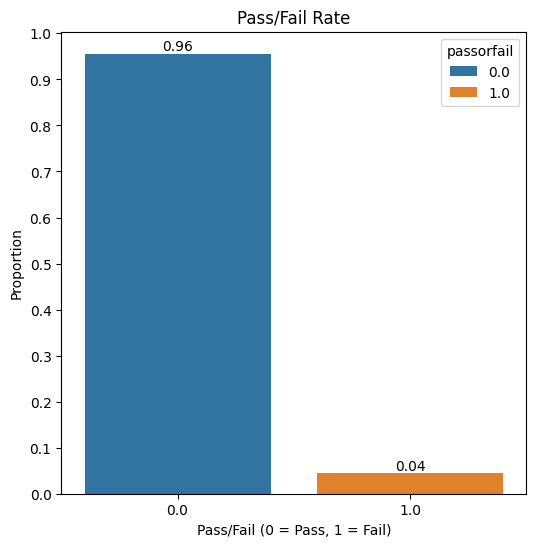

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First, calculate the proportion of failures in the 'passorfail' column
failure_rate = df_main_features['passorfail'].value_counts(normalize=True)

# Plot the failure rates with count labels on top of the bars
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=failure_rate.index, y=failure_rate.values, hue=failure_rate.index)

# Add count labels on top of the bars, excluding very small values
for p in ax.patches:
    if p.get_height() > 0.01:  # Only add labels for values above 0.01
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

plt.title('Pass/Fail Rate')
plt.xlabel('Pass/Fail (0 = Pass, 1 = Fail)')
plt.ylabel('Proportion')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

- 불량률은 약 4% 정도임을 확인할 수 있음
- 양품과 불량의 비율이 불균형함을 확인

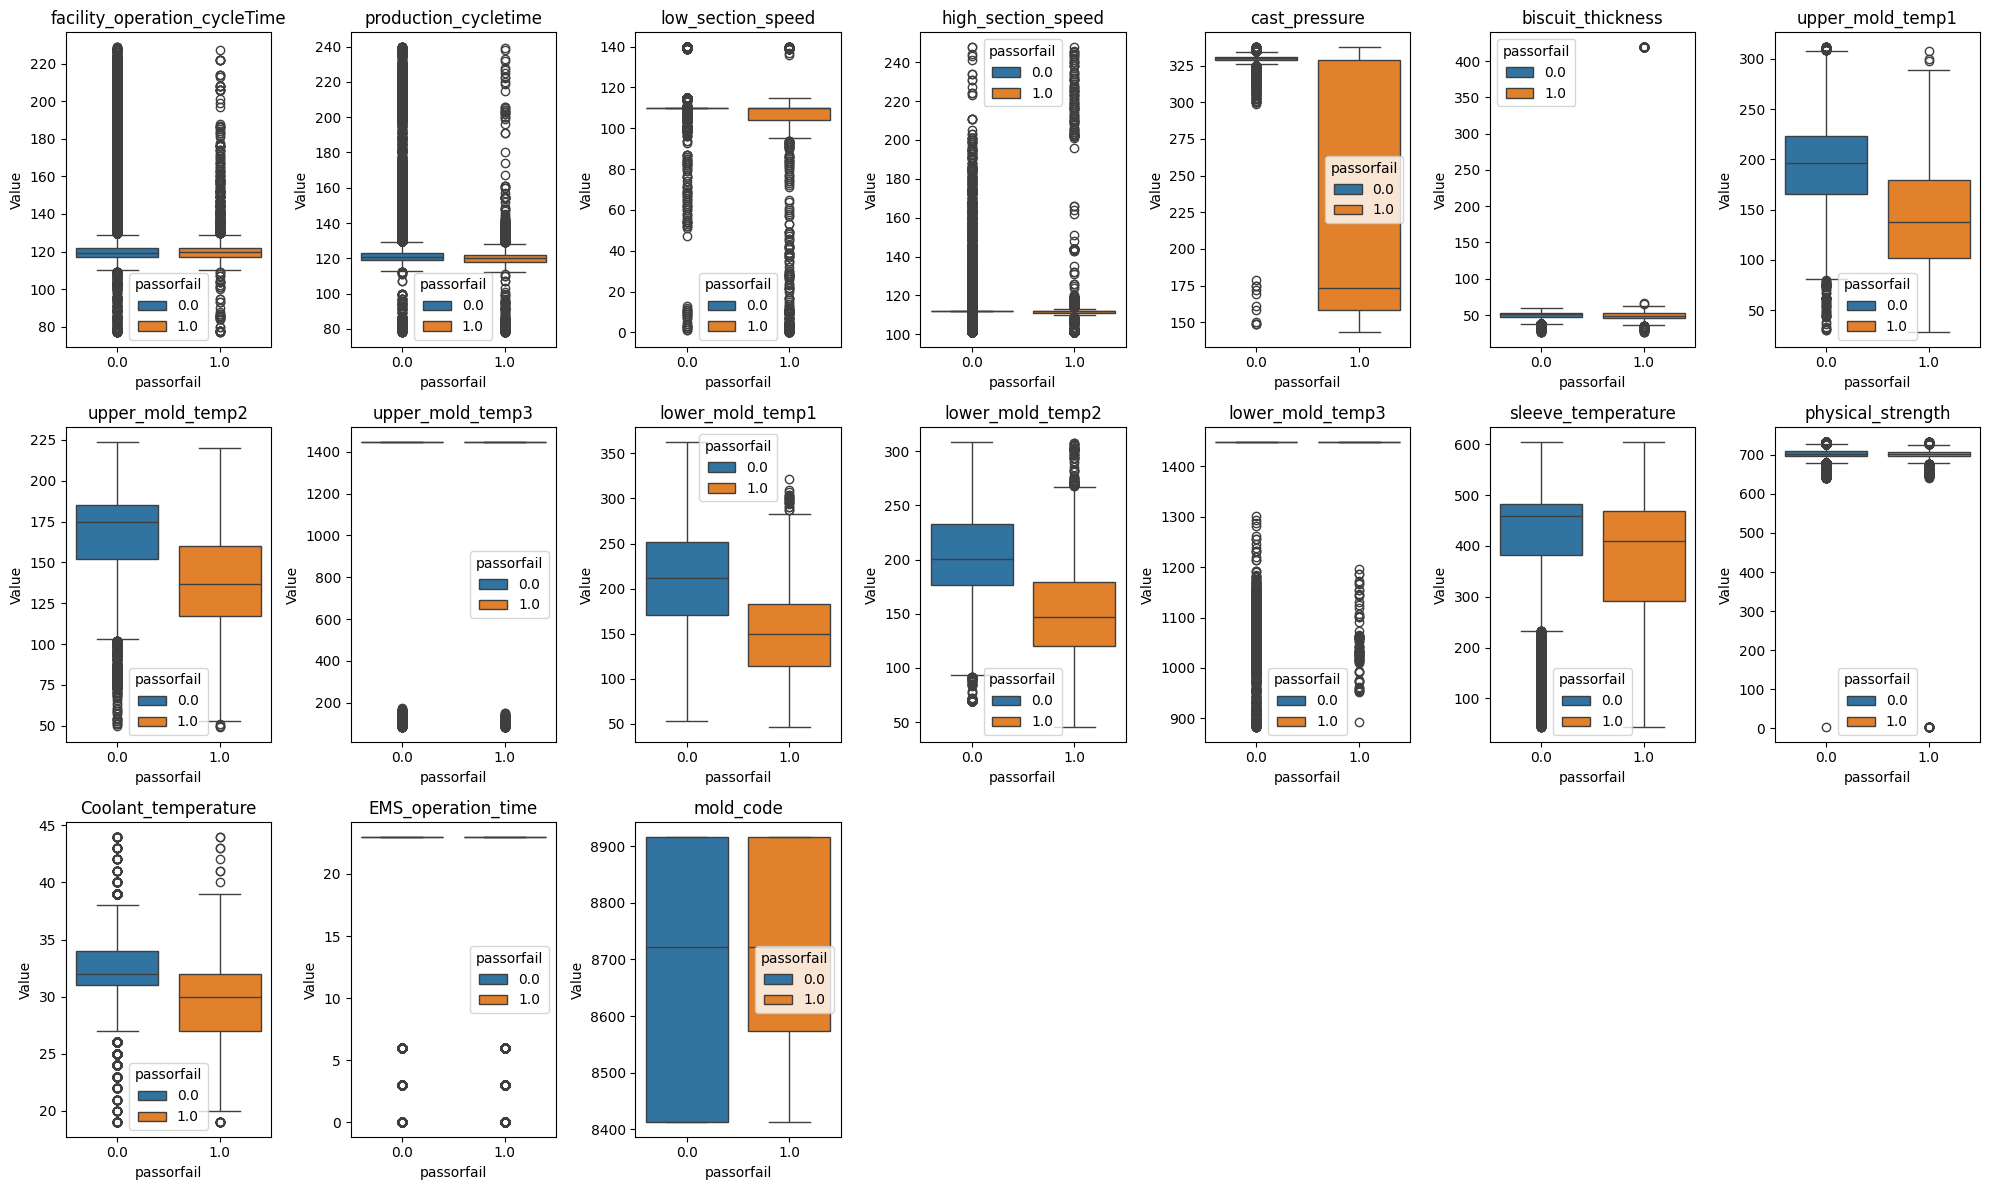

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataframe to bring it into a long format suitable for boxplot
df_melted = df_filtered.melt(id_vars='passorfail', var_name='Feature', value_name='Value')

# Get a list of unique features to loop over
features = df_melted['Feature'].unique()

# Set up the number of rows and columns for subplots (adjust based on the number of features)
num_cols = 7  # Number of columns in the grid
num_rows = (len(features) // num_cols) + 1  # Calculate the number of rows

# Set up the figure for subplots
plt.figure(figsize=(20, num_rows * 4))

# Loop through each feature and create a boxplot for it
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='passorfail', y='Value', hue='passorfail', data=df_melted[df_melted['Feature'] == feature])
    plt.title(f'{feature}')
    plt.tight_layout()

plt.show()

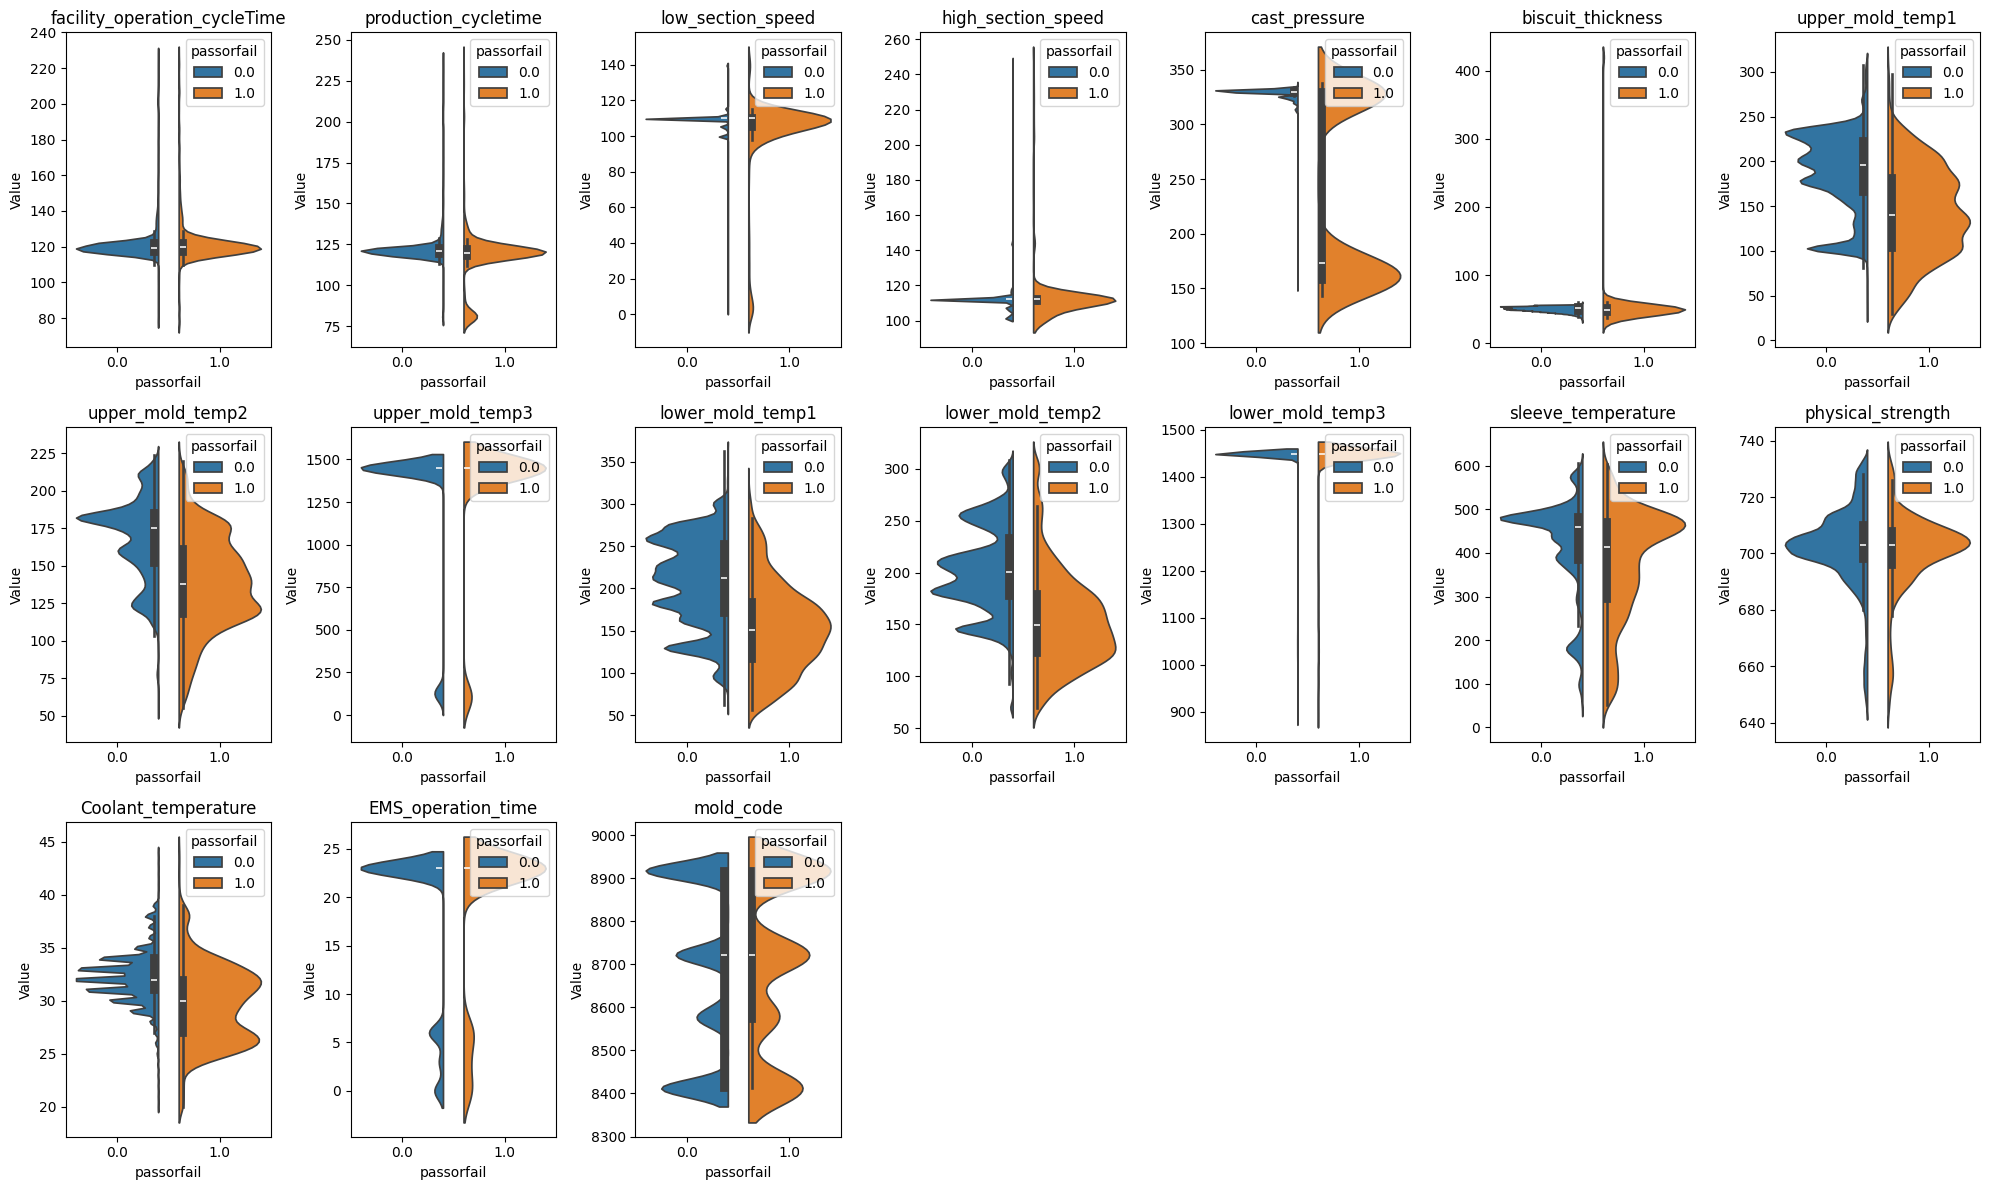

In [54]:
# Recreate the df_filtered dataset
# (The previous context has been lost, so let's assume it's the same df_main_features from earlier)

# Use the same filtering process to create df_filtered
import numpy as np

df_filtered = df_main_features.copy()

# Initialize dictionaries to store UCL and LCL for each column
UCL_dict = {}
LCL_dict = {}

# Calculate the UCL and LCL for all columns (excluding 'passorfail')
for col in df_filtered.columns.drop('passorfail'):
    UCL_dict[col] = np.percentile(df_filtered[col], 99.9)  # Upper Control Limit (99.9th percentile)
    LCL_dict[col] = np.percentile(df_filtered[col], 0.1)   # Lower Control Limit (0.1th percentile)
    
    # Filter the dataframe based on the calculated percentiles
    df_filtered = df_filtered[(df_filtered[col] <= UCL_dict[col]) & (df_filtered[col] >= LCL_dict[col])]

# Now apply the violin plot as requested
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataframe to bring it into a long format suitable for violin plot
df_melted = df_filtered.melt(id_vars='passorfail', var_name='Feature', value_name='Value')

# Get a list of unique features to loop over
features = df_melted['Feature'].unique()

# Set up the number of rows and columns for subplots (adjust based on the number of features)
num_cols = 7  # Number of columns in the grid
num_rows = (len(features) // num_cols) + 1  # Calculate the number of rows

# Set up the figure for subplots
plt.figure(figsize=(20, num_rows * 4))

# Loop through each feature and create a violin plot for it
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.violinplot(x='passorfail', y='Value', hue='passorfail', data=df_melted[df_melted['Feature'] == feature], split=True)
    plt.title(f'{feature}')
    plt.tight_layout()

plt.show()

- It is possible to observe the difference in data distribution between pass and fail for the variables **cast_pressure, upper_mold_temp1, upper_mold_temp2, lower_mold_temp1, lower_mold_temp2, and coolant_temperature** through both boxplot and violin plot visualizations.

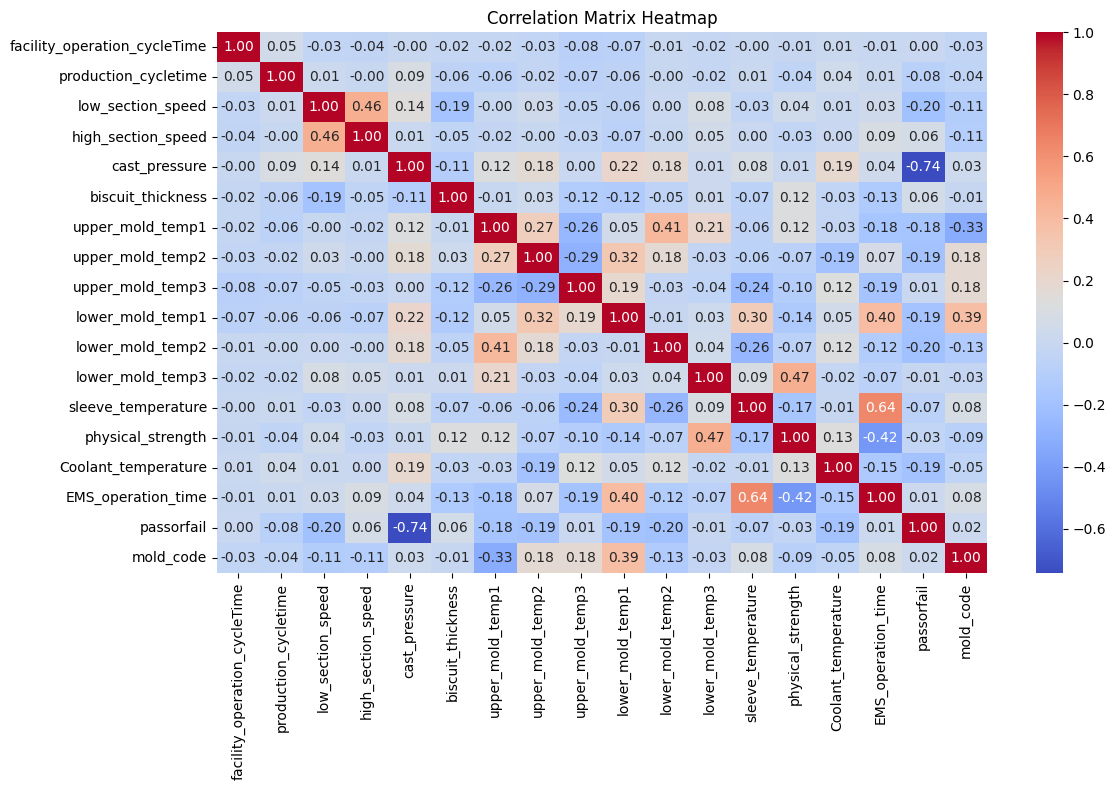

In [55]:
# Compute the correlation matrix for df_filtered
correlation_matrix = df_filtered.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.tight_layout()
plt.show()

### 산점도 변수끼리 하나 잡아서 그려보기?

In [60]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87364 entries, 90 to 92014
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   facility_operation_cycleTime  87364 non-null  int64  
 1   production_cycletime          87364 non-null  int64  
 2   low_section_speed             87364 non-null  float64
 3   high_section_speed            87364 non-null  float64
 4   cast_pressure                 87364 non-null  float64
 5   biscuit_thickness             87364 non-null  float64
 6   upper_mold_temp1              87364 non-null  float64
 7   upper_mold_temp2              87364 non-null  float64
 8   upper_mold_temp3              87364 non-null  float64
 9   lower_mold_temp1              87364 non-null  float64
 10  lower_mold_temp2              87364 non-null  float64
 11  lower_mold_temp3              87364 non-null  float64
 12  sleeve_temperature            87364 non-null  float64
 13  physi

pivot tables 내용 추가

In [57]:
pivot_mold_passorfail = df_filtered.pivot_table(index='mold_code', values=df_filtered.columns.drop('mold_code'), aggfunc='mean')
pivot_mold_passorfail

,Coolant_temperature,EMS_operation_time,biscuit_thickness,cast_pressure,facility_operation_cycleTime,high_section_speed,low_section_speed,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,passorfail,physical_strength,production_cycletime,sleeve_temperature,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3
mold_code,,,,,,,,,,,,,,,,,
8412,32.847865,11.910436,51.485936,323.799007,120.770124,112.851266,110.424445,152.018086,195.131674,1449.00000,0.027641,710.030125,121.858446,363.213572,196.010150,146.879447,1449.000000
8413,30.233183,23.000000,47.432482,327.966116,122.848940,112.016358,109.769654,255.414956,234.450843,1449.00000,0.032716,697.457353,122.794024,382.904857,208.841095,196.653981,1449.000000
8573,31.127893,23.000000,52.969600,325.414400,124.066667,112.325867,109.870187,179.396267,200.919253,1449.00000,0.030933,706.966933,124.627627,496.082240,219.552853,187.550400,214.649707
8576,32.685897,3.037179,50.585897,326.961538,121.070513,111.839744,109.955128,184.534615,240.169231,1449.00000,0.039744,714.455128,121.469231,136.229487,162.003846,171.932051,1449.000000
8600,31.455898,23.000000,47.578463,322.834219,121.978392,120.558626,113.990081,209.412327,187.035069,1449.00000,0.035423,691.504782,124.565356,500.132837,220.412327,172.619199,1449.000000
8722,33.729518,23.000000,47.323744,325.888637,122.238164,109.210529,105.828942,225.381639,216.736517,1416.58275,0.040912,692.966653,122.579765,462.990171,182.121912,150.606731,1449.000000
8917,31.575230,16.783837,50.862024,326.480913,120.674606,111.291097,108.846616,224.004106,189.093200,1449.00000,0.035250,705.080913,121.228942,400.828548,167.480519,177.086629,1449.000000


In [62]:
df_filtered['cast_pressure_bins'] = pd.cut(df_filtered['cast_pressure'], bins=10)
pivot_pressure = df_filtered.pivot_table(index='cast_pressure_bins', values='passorfail', aggfunc='mean')
pivot_pressure

,passorfail
cast_pressure_bins,
"(142.805, 162.5]",0.994903
"(162.5, 182.0]",0.992978
"(182.0, 201.5]",1.000000
"(240.5, 260.0]",1.000000
"(260.0, 279.5]",1.000000
"(279.5, 299.0]",0.500000
"(299.0, 318.5]",0.030625
"(318.5, 338.0]",0.014367


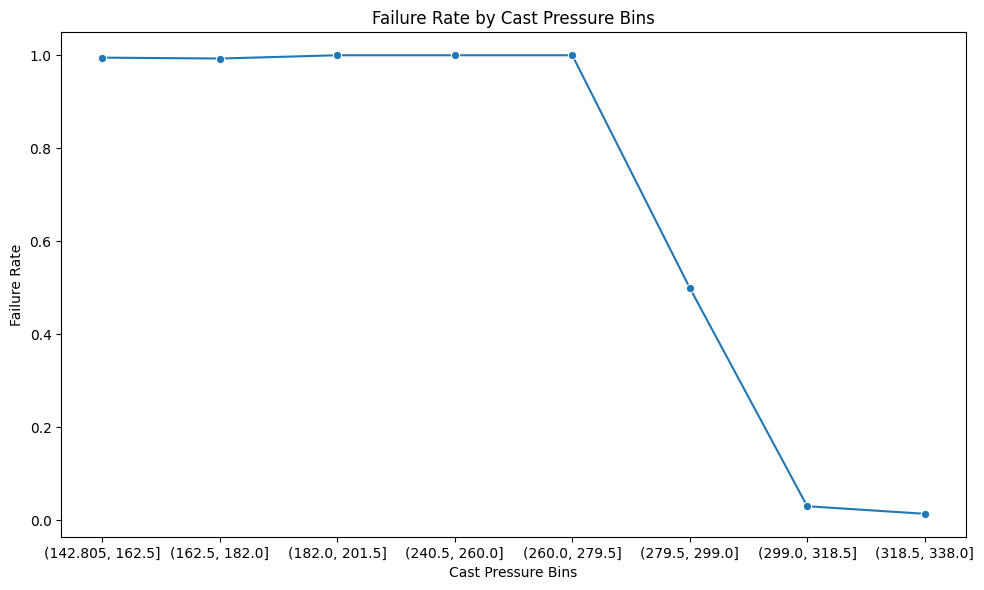

In [66]:
# Create a line plot for the pivot table showing cast pressure bins vs pass/fail rate
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_pressure, x=pivot_pressure.index.astype(str), y='passorfail', marker='o')

# Set labels and title
plt.xlabel('Cast Pressure Bins')
plt.ylabel('Failure Rate')
plt.title('Failure Rate by Cast Pressure Bins')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)/

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df_filtered['upper_mold_temp1_bins'] = pd.cut(df_filtered['upper_mold_temp1'], bins=5)
pivot_temp = df_filtered.pivot_table(index='upper_mold_temp1_bins', values='passorfail', aggfunc='mean')